In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Introduction**
Stroke is a disease that affects the arteries leading to and within the brain.A stroke occurs when a blood vessel that carries oxygen and nutrients to the brain is either blocked by a clot or bursts.

##**Dataset :**
* According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
##**Attribute Information**
*1) id: unique identifier
*2) gender: "Male", "Female" or "Other"
*3) age: age of the patient
*4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
*5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
*6) ever_married: "No" or "Yes"
*7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
*8) Residence_type: "Rural" or "Urban"
*9) avg_glucose_level: average glucose level in blood
*10) bmi: body mass index
*11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
*12) stroke: 1 if the patient had a stroke or 0 if not
###Note: "Unknown" in smoking_status means that the information is unavailable for this patient
###Acknowledgements
*(Confidential Source) - Use only for educational purposes
If you use this dataset in your research, please credit the author.


###Import Libraries


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats   # Q-Q plot for checking Data Normalization
from scipy import stats       # Test for checking Data Normalization
from sklearn.preprocessing import LabelEncoder    # convert object and category variables
from sklearn.model_selection import train_test_split # Spliting
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Scores for ML Models

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

1. Load dataset

In [89]:
df=pd.read_csv('/content/drive/MyDrive/0.Latest_DS_Course/Ensemble/Data/healthcare-dataset-stroke-data.csv')

### Data Inspection

In [90]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [91]:
df.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


### checking missing values

In [94]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


### Filling missing values

In [95]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)  # Fill with mean


<ipython-input-95-bebe33ad653a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)  # Fill with mean


In [96]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


###Checking duplicate values

In [97]:
df.duplicated().sum()

np.int64(0)

##Checking data distribution

<Axes: xlabel='stroke', ylabel='count'>

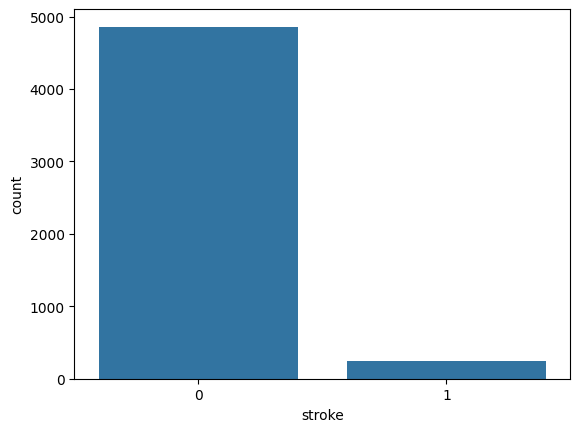

In [98]:
sns.countplot(data=df, x='stroke')

In [99]:
df['stroke'].value_counts(normalize=True)

,proportion
stroke,
0,0.951272
1,0.048728


### Encoding Categorical columns

In [100]:

# df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True) # for converting the categorical variables to numerical

In [101]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Apply label encoding to each column
for col in columns_to_encode:
    df[col] = encoder.fit_transform(df[col])

In [102]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [103]:
X = df.drop(['stroke', 'id'], axis=1)
y = df['stroke']                # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42, stratify = y)

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['age', 'avg_glucose_level' , 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level' , 'bmi']]) # standardizing the data

In [105]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [106]:
# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy of the model
    print(f"{model_name} Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9511
Random Forest Accuracy: 0.9481
Gradient Boosting Accuracy: 0.9481
Support Vector Machine Accuracy: 0.9511
K-Nearest Neighbors Accuracy: 0.9432


In [107]:

GBM = GradientBoostingClassifier(random_state = 42)

GBM.fit(X_train, y_train)

y_pred_GBM = GBM.predict(X_test)
acc_GBM = accuracy_score(y_test, y_pred_GBM)

print(classification_report(y_test, y_pred_GBM, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_GBM * 100))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.20      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.58      0.51      0.50      1022
weighted avg       0.92      0.95      0.93      1022

Accuracy Score is : 94.81%


In [108]:

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
    # 'subsample': [0.8, 1.0]
}

# Initialize base model
GBM = GradientBoostingClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=GBM, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Best model
best_gbm = grid_search.best_estimator_

# Evaluate
y_pred = best_gbm.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, zero_division=0))
print("Best Parameters:", grid_search.best_params_)
print("Accuracy Score is : {:.2f}%".format(acc * 100))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Accuracy Score is : 94.91%


In [109]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform, randint

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.3),
    # 'max_depth': randint(3, 6),
    # 'min_samples_split': randint(2, 10),
    # 'min_samples_leaf': randint(1, 5),
    # 'subsample': uniform(0.7, 0.3)
}

GBM = GradientBoostingClassifier(random_state=42)

# Random Search
random_search = RandomizedSearchCV(estimator=GBM, param_distributions=param_dist,
                                   n_iter=50, scoring='accuracy', cv=5,
                                   n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train, y_train)

# Best model
best_gbm = random_search.best_estimator_

# Evaluate
y_pred = best_gbm.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, zero_division=0))
print("Best Parameters:", random_search.best_params_)
print("Accuracy Score is : {:.2f}%".format(acc * 100))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Best Parameters: {'learning_rate': np.float64(0.012119891565915222), 'n_estimators': 188}
Accuracy Score is : 94.91%


### How to fine tune n_estimators

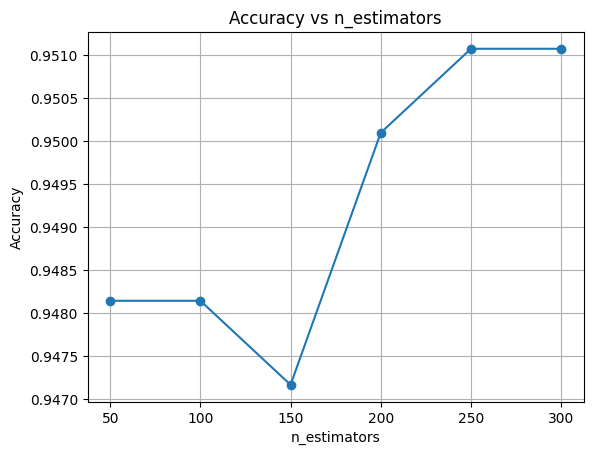

Best n_estimators = 250 with Accuracy = 0.95


In [110]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

n_estimators_range = [50, 100, 150, 200, 250, 300]
scores = []

for n in n_estimators_range:
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

# Plot
plt.plot(n_estimators_range, scores, marker='o')
plt.title("Accuracy vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Best value
best_n = n_estimators_range[scores.index(max(scores))]
print(f"Best n_estimators = {best_n} with Accuracy = {max(scores):.2f}")


In [111]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

gbm = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(estimator=gbm,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict & evaluate
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Best n_estimators:", grid_search.best_params_['n_estimators'])
print("Accuracy Score is : {:.2f}%".format(acc * 100))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best n_estimators: 50
Accuracy Score is : 94.81%


In [112]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_clf.fit(X_train, y_train)

# Predict
y_pred = xgb_clf.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, zero_division=0))
print("Accuracy Score is : {:.2f}%".format(acc * 100))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       972
           1       0.33      0.12      0.18        50

    accuracy                           0.95      1022
   macro avg       0.64      0.55      0.57      1022
weighted avg       0.93      0.95      0.93      1022

Accuracy Score is : 94.52%


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


##Hyperparameter Tuning for One Parameter (e.g., n_estimators)

In [113]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200]
}

xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

# Best model and evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Best n_estimators:", grid_search.best_params_['n_estimators'])
print("Accuracy Score is : {:.2f}%".format(acc * 100))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best n_estimators: 50
Accuracy Score is : 94.52%


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


##Hyperparameter Tuning for Multiple Parameters

In [114]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
}

xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

# Best model and evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy Score is : {:.2f}%".format(acc * 100))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Accuracy Score is : 95.11%


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


NotFittedError: need to call fit or load_model beforehand

##Plot: Accuracy vs n_estimators (Manual Search)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

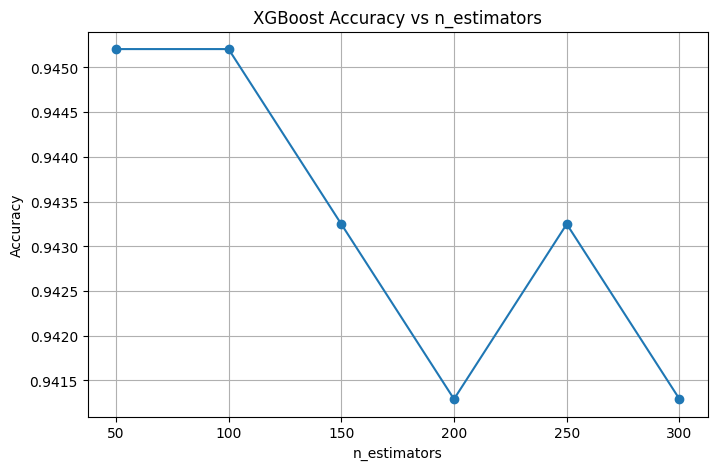

Best n_estimators = 50 with Accuracy = 0.95


In [115]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score

n_estimators_range = [50, 100, 150, 200, 250, 300]
scores = []

for n in n_estimators_range:
    model = xgb.XGBClassifier(n_estimators=n, use_label_encoder=False,
                              eval_metric='mlogloss', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, scores, marker='o')
plt.title("XGBoost Accuracy vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Best estimator
best_n = n_estimators_range[scores.index(max(scores))]
print(f"Best n_estimators = {best_n} with Accuracy = {max(scores):.2f}")


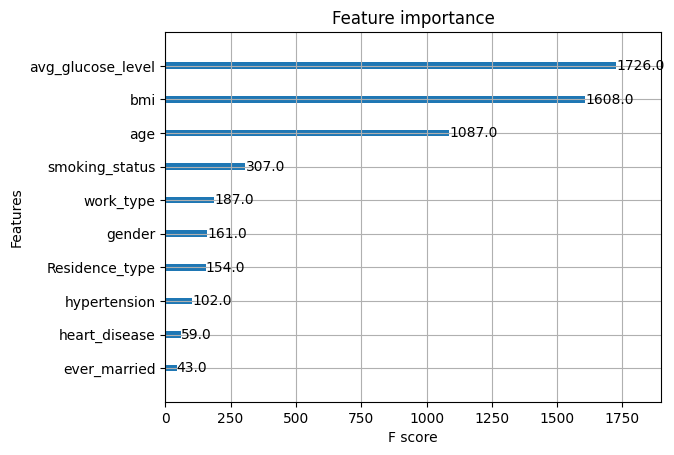

In [118]:
# Basic plot
xgb.plot_importance(model)
plt.show()

## RandomizedSearchCV for Faster Hyperparameter Tuning

In [116]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

param_dist = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 8),
    'subsample': uniform(0.7, 0.3),
}

random_search = RandomizedSearchCV(estimator=xgb_clf,
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=5,
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print("Accuracy Score is : {:.2f}%".format(acc * 100))


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:56:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': np.float64(0.025443625374996805), 'max_depth': 7, 'n_estimators': 228, 'subsample': np.float64(0.7718685672000917)}
Accuracy Score is : 95.21%
